**4. Banknote**
---

<https://archive.ics.uci.edu/ml/datasets/banknote+authentication>


In [1]:
### Basic Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.io import loadmat

### Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


#### Datasets, Metrics and Preprocessing

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.utils.multiclass import unique_labels

In [2]:
# import classiy function from the 'main_functions' notebook
from ipynb.fs.defs.main_functions import classify, plot_confusion, del_nan

In [3]:
# Defining the classifier that can be used with easy calling names
classifiers = {'Naive Bayes': GaussianNB, 'KNN': KNeighborsClassifier, 'Logistic Regression': LogisticRegression,\
              'RF': RandomForestClassifier, 'SVM': SVC, 'SGD': SGDClassifier, 'AdaBoost': AdaBoostClassifier}

In [4]:
# Reading the dataset and creating the dataframe
banknotes = pd.read_csv('data_banknote_authentication.txt', names=['var','skew','curt','entropy','y'])

df = pd.DataFrame(banknotes)

In [5]:
df

,var,skew,curt,entropy,y
0,3.621600,8.66610,-2.807300,-0.446990,0
1,4.545900,8.16740,-2.458600,-1.462100,0
2,3.866000,-2.63830,1.924200,0.106450,0
3,3.456600,9.52280,-4.011200,-3.594400,0
4,0.329240,-4.45520,4.571800,-0.988800,0
5,4.368400,9.67180,-3.960600,-3.162500,0
6,3.591200,3.01290,0.728880,0.564210,0
7,2.092200,-6.81000,8.463600,-0.602160,0
8,3.203200,5.75880,-0.753450,-0.612510,0
9,1.535600,9.17720,-2.271800,-0.735350,0


In [6]:
df, df_test = train_test_split(df, test_size=0.2, stratify=df['y'])

# Exploratory Data Analysis (EDA)
This step is to get to know the data and decide what type of preprocessing needs to be done before training the model

In [7]:
df.head()

,var,skew,curt,entropy,y
776,-5.90340,6.5679,0.67661,-6.67970,1
1170,-0.34890,3.1929,-3.40540,-3.18320,1
711,1.72570,-4.4697,8.22190,-1.80730,0
78,0.24835,7.6439,0.98850,-0.87371,0
699,3.91660,10.2491,-4.09260,-4.46590,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097 entries, 776 to 1084
Data columns (total 5 columns):
var        1097 non-null float64
skew       1097 non-null float64
curt       1097 non-null float64
entropy    1097 non-null float64
y          1097 non-null int64
dtypes: float64(4), int64(1)
memory usage: 51.4 KB


In [9]:
df.describe()

,var,skew,curt,entropy,y
count,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000
mean,0.425119,1.969410,1.358264,-1.201569,0.444850
std,2.848822,5.860817,4.241540,2.093376,0.497176
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.807600,-1.767200,-1.544300,-2.466800,0.000000
50%,0.508130,2.307200,0.628630,-0.582770,0.000000
75%,2.823200,6.857600,3.139200,0.385760,1.000000
max,6.824800,12.951600,17.927400,2.162500,1.000000


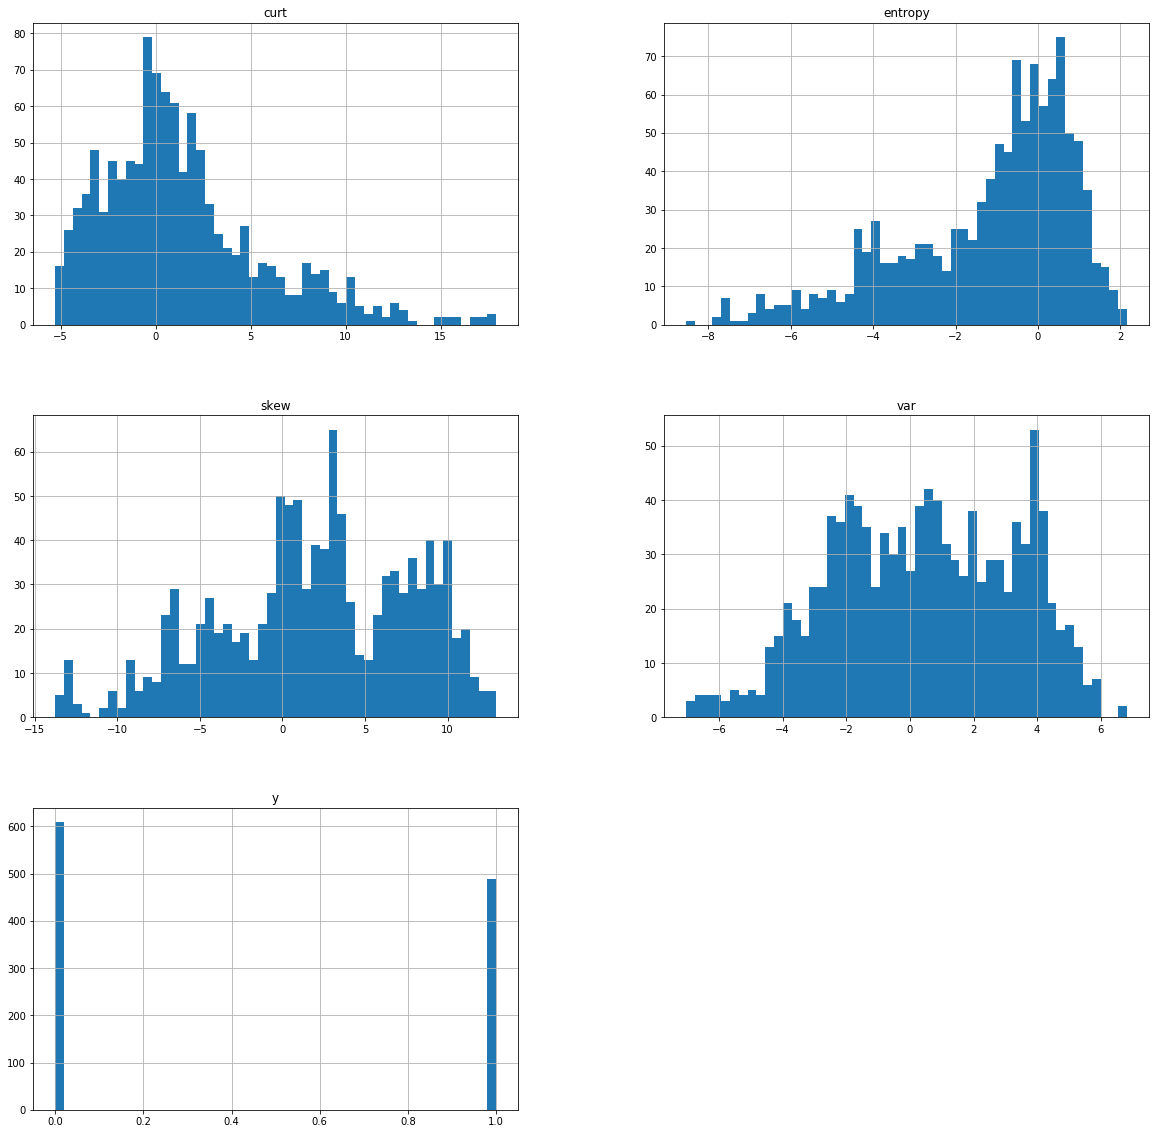

In [10]:
df.hist(bins= 50, figsize=(20,20))
plt.show()

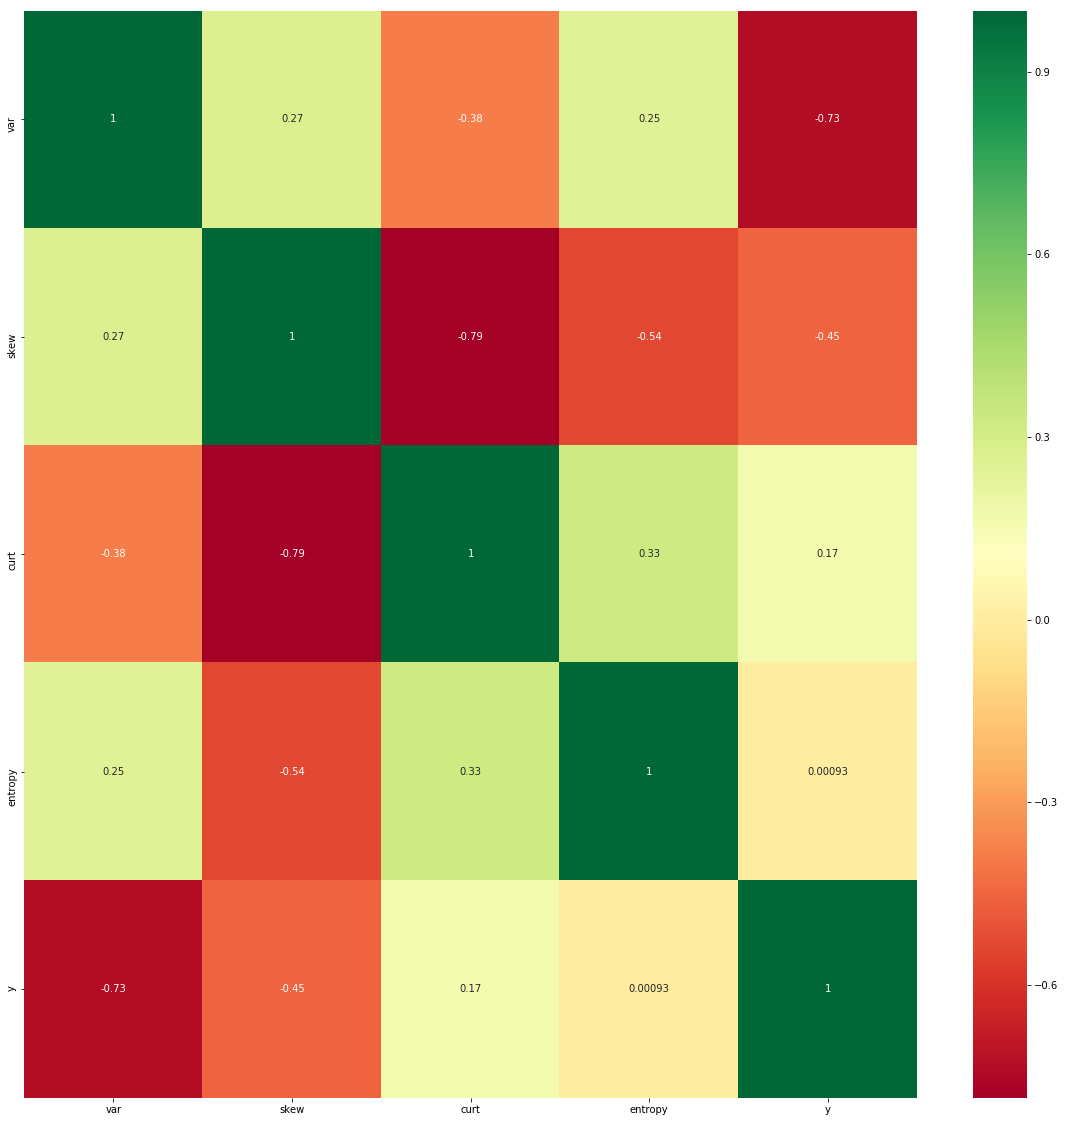

In [11]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
# top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn")

In [12]:
corrmat['y'].sort_values(ascending=True)

var       -0.729743
skew      -0.454157
entropy    0.000930
curt       0.167619
y          1.000000
Name: y, dtype: float64

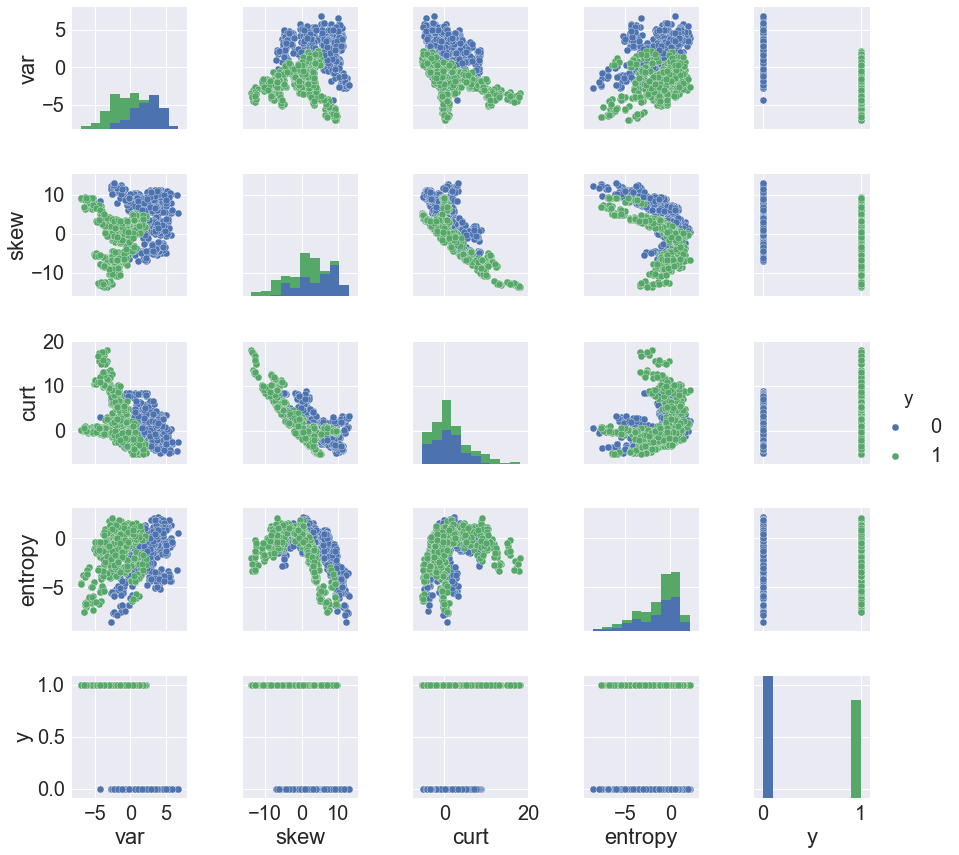

In [13]:
import seaborn as sns
sns.set(font_scale=2)
sns.pairplot(df, hue='y')

In [14]:
df['y'].value_counts()
df['y'].value_counts()/df['y'].value_counts().sum()
# print(ratio)

0    0.55515
1    0.44485
Name: y, dtype: float64

# Preprocessing

**In this dataset:** <br>
- No categorical attributes exists <br>
- I did not consider it as imbalanced since the ratio is almost 2:3
- Scaling will be applied

In [15]:
scaler = MinMaxScaler()
df_features = df.drop('y',axis=1)
cancer_prepared = scaler.fit_transform(df_features)

# 1. Naive Bayes

In [16]:
sns.set(font_scale=1)
sns.set_style('ticks')

The model score is 0.853 (+/- 0.031)
The IQR is 0.029 between [0.84,0.87]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      6090
         1.0       0.86      0.81      0.83      4880

    accuracy                           0.85     10970
   macro avg       0.85      0.85      0.85     10970
weighted avg       0.85      0.85      0.85     10970

The average training time is 0.002213 seconds


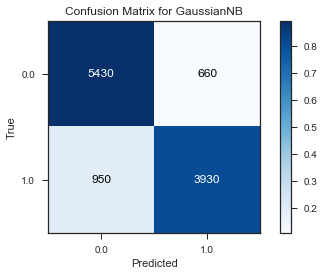

In [17]:
val_conf_NB, val_scores_NB, val_time_NB = classify(df.drop('y',axis=1), np.array(df['y']), classifiers['Naive Bayes']())
print('The average training time is %0.6f seconds'%val_time_NB.mean())

The test accuracy is 0.80
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       161
           1       0.75      0.80      0.77       114

    accuracy                           0.80       275
   macro avg       0.80      0.80      0.80       275
weighted avg       0.81      0.80      0.80       275



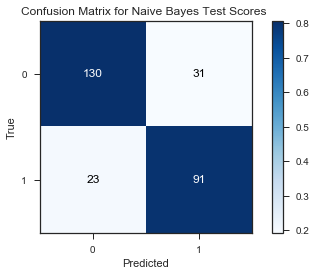

In [18]:
#  Fitting on the training data
NB = classifiers['Naive Bayes']()
NB.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = NB.predict(df_test.drop('y',axis=1))
test_score_NB = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_NB)
print(classification_report(test_pred, df_test['y']))
_,test_conf_NB = plot_confusion(test_pred, df_test['y'],'Naive Bayes Test Scores ()')

# 2. Logistic Regression

The model score is 0.955 (+/- 0.019)
The IQR is 0.027 between [0.95,0.97]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      6090
         1.0       0.97      0.93      0.95      4880

    accuracy                           0.96     10970
   macro avg       0.96      0.95      0.95     10970
weighted avg       0.96      0.96      0.96     10970

The average training time is 0.002471 seconds


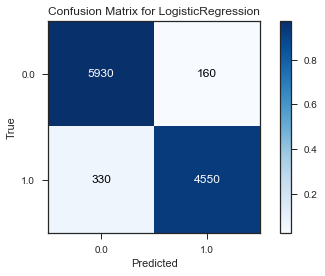

In [19]:
val_conf_LR, val_scores_LR, val_time_LR = classify(cancer_prepared, np.array(df['y']),
                                              classifiers['Logistic Regression'](solver='liblinear'))
print('The average training time is %0.6f seconds'%val_time_LR.mean())

In [20]:
scaled_test = scaler.transform(df_test.drop('y',axis=1))

The test accuracy is 0.94
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       156
           1       0.92      0.94      0.93       119

    accuracy                           0.94       275
   macro avg       0.94      0.94      0.94       275
weighted avg       0.94      0.94      0.94       275



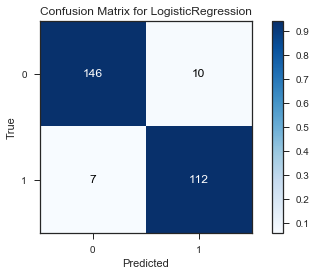

In [21]:
#  Fitting on the training data
LR = classifiers['Logistic Regression'](solver='liblinear')
LR.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = LR.predict(scaled_test)
test_score_LR = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_LR)
print(classification_report(test_pred, df_test['y']))
_,test_conf_LR = plot_confusion(test_pred, df_test['y'],LR)

# 3. Ensemble - Random Forests

n_estimators=500

The model score is 0.993 (+/- 0.009)
The IQR is 0.009 between [0.99,1.00]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      6090
         1.0       0.99      0.99      0.99      4880

    accuracy                           0.99     10970
   macro avg       0.99      0.99      0.99     10970
weighted avg       0.99      0.99      0.99     10970

The average training time is 0.715846 seconds


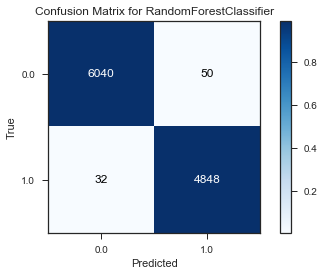

In [22]:
val_conf_RF, val_scores_RF, val_time_RF = classify(df.drop('y',axis=1), df['y'],
                                                   classifiers['RF'](n_estimators = 500,n_jobs=-1))
print('The average training time is %0.6f seconds'%val_time_RF.mean())

The test accuracy is 1.00
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       152
           1       1.00      0.99      1.00       123

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



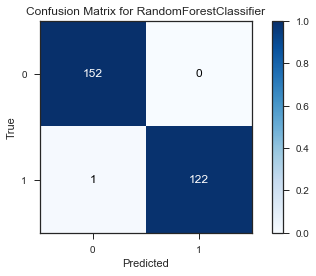

In [23]:
#  Fitting on the training data
RF = classifiers['RF'](n_estimators = 500, n_jobs=-1)
RF.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = RF.predict(df_test.drop('y',axis=1))
test_score_RF = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_RF)
print(classification_report(test_pred, df_test['y']))
_,test_conf_RF = plot_confusion(test_pred, df_test['y'],RF)

# 4. Ensemble - AdaBoost

The model score is 0.997 (+/- 0.004)
The IQR is 0.009 between [0.99,1.00]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6090
         1.0       1.00      1.00      1.00      4880

    accuracy                           1.00     10970
   macro avg       1.00      1.00      1.00     10970
weighted avg       1.00      1.00      1.00     10970

The average training time is 0.312494 seconds


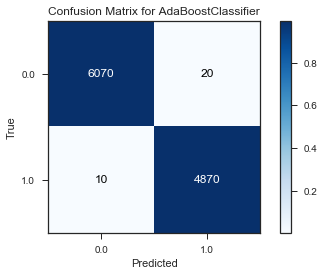

In [24]:
val_conf_Ada, val_scores_Ada, val_time_Ada = classify(df.drop('y',axis=1), df['y'],
                                                      classifiers['AdaBoost'](n_estimators=200))
print('The average training time is %0.6f seconds'%val_time_Ada.mean())

The test accuracy is 1.00
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       154
           1       0.99      1.00      1.00       121

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



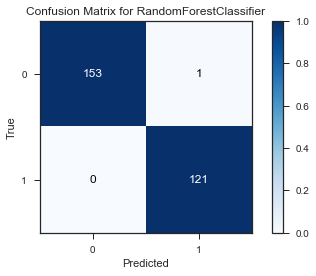

In [25]:
#  Fitting on the training data
Ada = classifiers['AdaBoost'](n_estimators = 200)
Ada.fit(df.drop('y',axis=1), df['y'])

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = Ada.predict(df_test.drop('y',axis=1))
test_score_Ada = accuracy_score(test_pred, df_test['y'])
print('The test accuracy is %0.2f'%test_score_Ada)
print(classification_report(test_pred, df_test['y']))
_,test_conf_Ada = plot_confusion(test_pred, df_test['y'],RF)

# 5. K-Nearest Neighbours

In [26]:
np.shape(df['y'])

(1097,)

The model score is 0.998 (+/- 0.004)
The IQR is 0.000 between [1.00,1.00]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6090
         1.0       1.00      1.00      1.00      4880

    accuracy                           1.00     10970
   macro avg       1.00      1.00      1.00     10970
weighted avg       1.00      1.00      1.00     10970

The model score is 0.998 (+/- 0.004)
The IQR is 0.000 between [1.00,1.00]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6090
         1.0       1.00      1.00      1.00      4880

    accuracy                           1.00     10970
   macro avg       1.00      1.00      1.00     10970
weighted avg       1.00      1.00      1.00     10970

The model score is 0.998 (+/- 0.004)
The IQR is 0.000 between [1.00,1.00]
There is 0 deleted rows
              precision    recall  f1-score   suppor

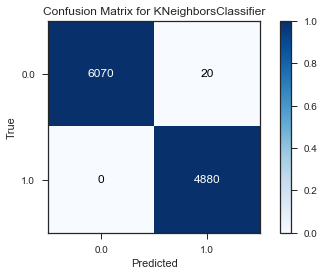

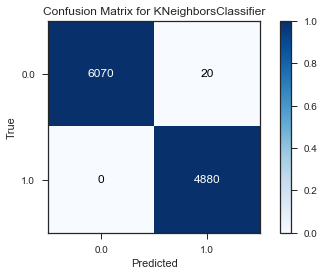

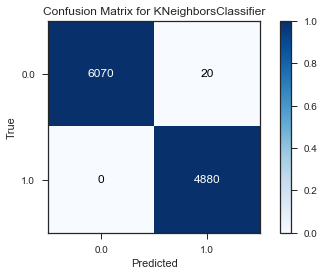

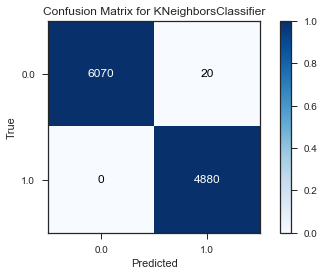

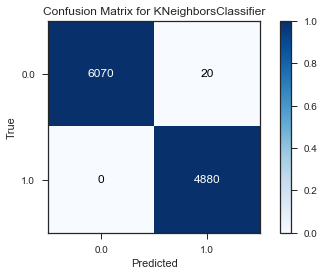

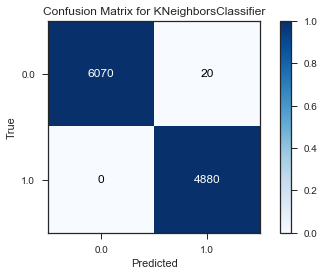

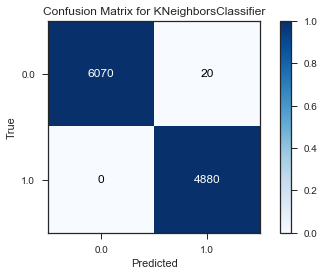

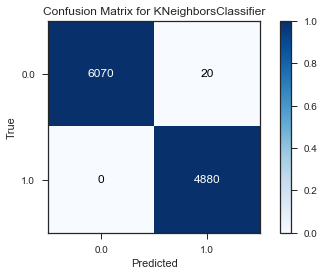

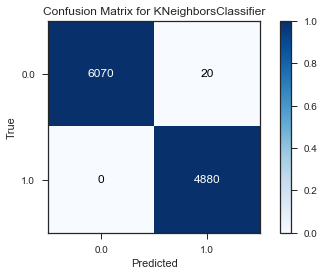

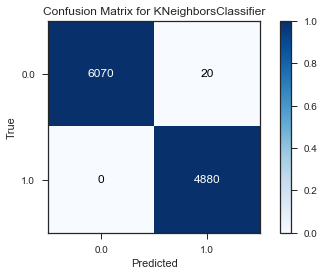

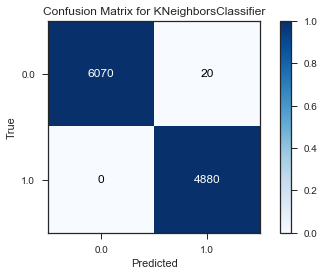

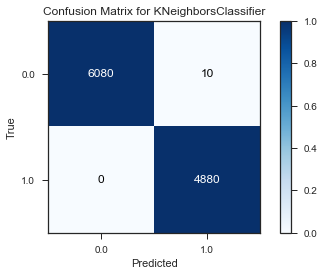

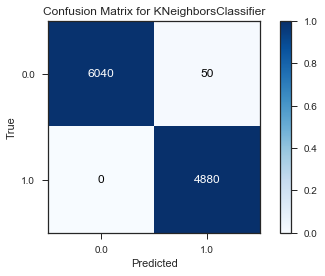

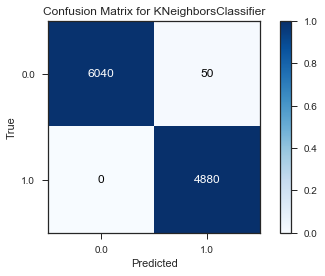

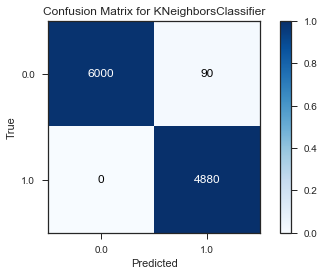

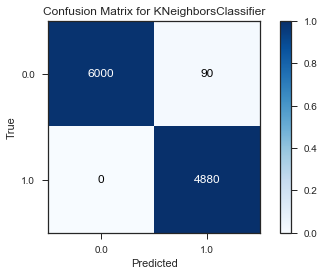

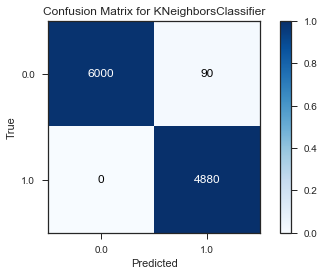

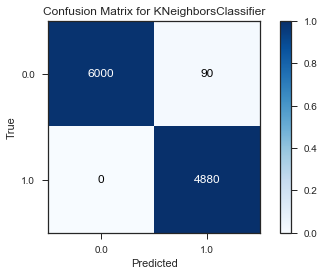

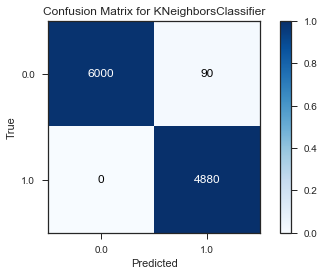

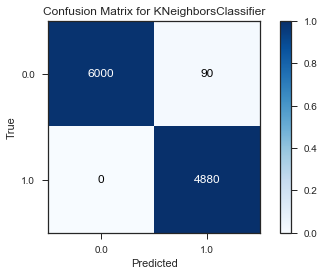

In [27]:
KNN_scores = []
for k in range(1,21):
    _, val_scores_KNN, _= classify(cancer_prepared, np.array(df['y']),classifiers['KNN'](k))
    KNN_scores.append(np.round(val_scores_KNN.mean(),4))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

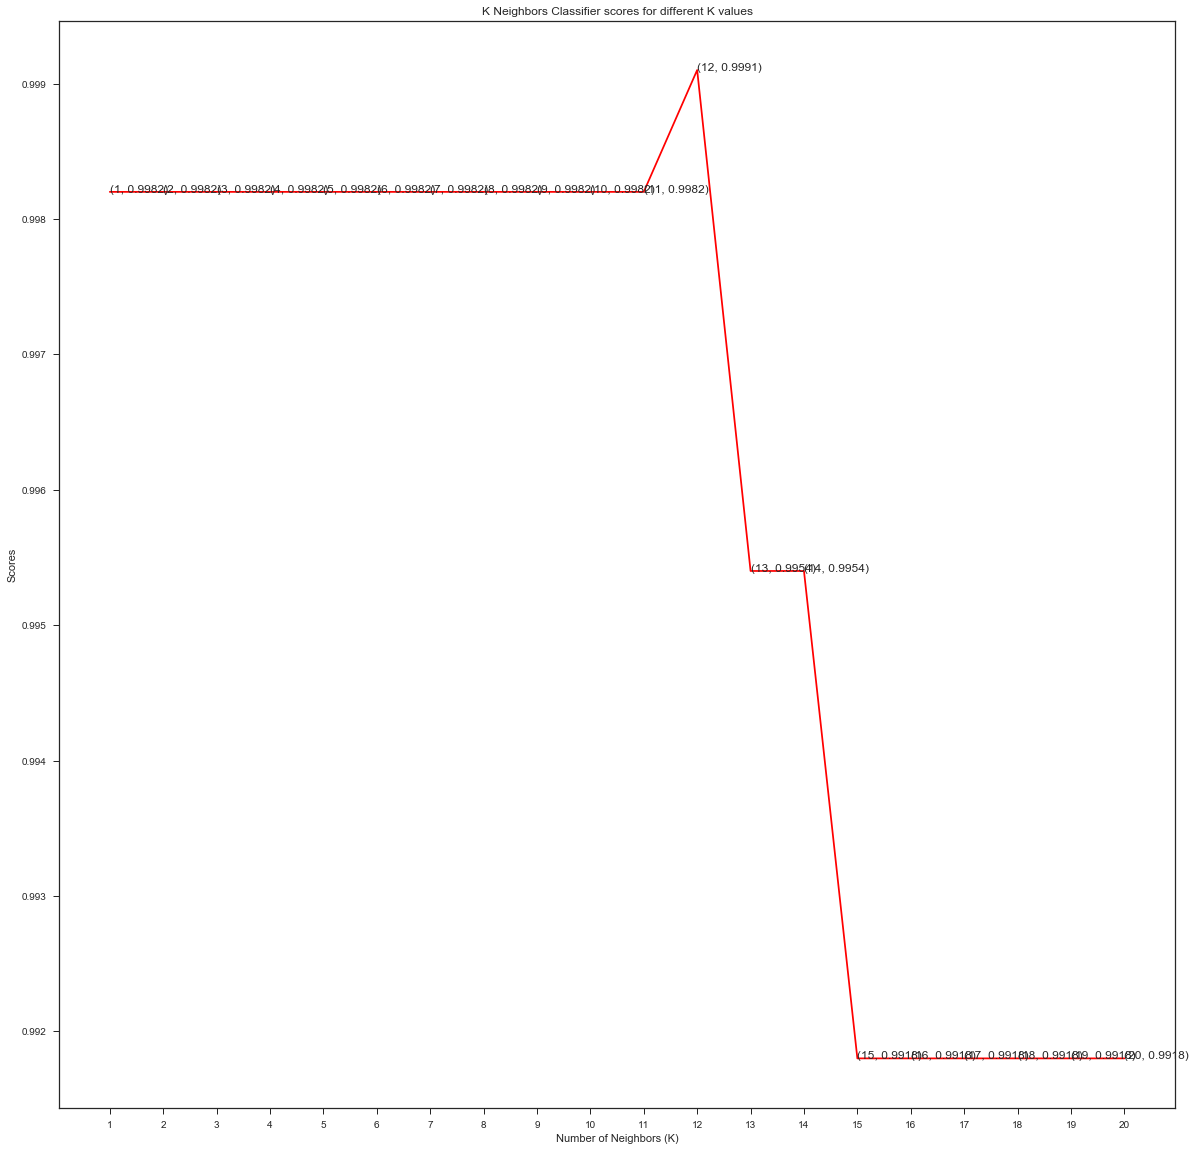

In [28]:
plt.figure(figsize=(20,20))
plt.plot([k for k in range(1, 21)], KNN_scores, color = 'red')
for i in range(1,21):
    plt.text(i, KNN_scores[i-1], (i, KNN_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

The model score is 0.999 (+/- 0.003)
The IQR is 0.000 between [1.00,1.00]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6090
         1.0       1.00      1.00      1.00      4880

    accuracy                           1.00     10970
   macro avg       1.00      1.00      1.00     10970
weighted avg       1.00      1.00      1.00     10970

The average training time is 0.001860 seconds


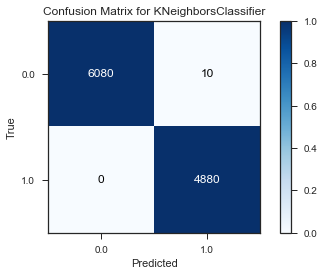

In [29]:
val_conf_KNN, val_scores_KNN, val_time_KNN = classify(cancer_prepared, np.array(df['y']),
                                                      classifiers['KNN'](KNN_scores.index(max(KNN_scores))+1))
print('The average training time is %0.6f seconds'%val_time_KNN.mean())

The test accuracy is 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



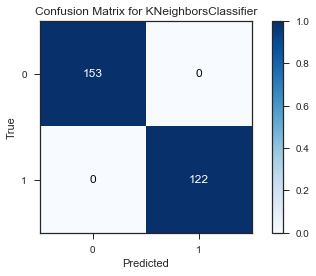

In [30]:
#  Fitting on the training data
KNN = classifiers['KNN'](KNN_scores.index(max(KNN_scores))+1)
KNN.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = KNN.predict(scaled_test)
test_score_KNN = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_KNN)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_KNN = plot_confusion(test_pred, df_test['y'],KNN)

# 6. Support Vector Machines - Linear Kernel

In [31]:
from time import time

In [32]:
param_grid = [
    {'C':2.**np.linspace(-5,15,21),'gamma':2.**np.linspace(-15,3,19)}
]

clf = SVC(kernel='linear')
start = time()
grid_search_L = GridSearchCV(clf, param_grid, cv=10, n_jobs=-1)
grid_search_L.fit(cancer_prepared, np.array(df['y']))
print('Time take to search for the best combination si %0.6f seconds'% (time()-start))

Time take to search for the best combination si 16.778828 seconds


The model score is 0.992 (+/- 0.008)
The IQR is 0.018 between [0.98,1.00]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      6090
         1.0       0.99      1.00      0.99      4880

    accuracy                           0.99     10970
   macro avg       0.99      0.99      0.99     10970
weighted avg       0.99      0.99      0.99     10970

The average training time is 0.007154 seconds


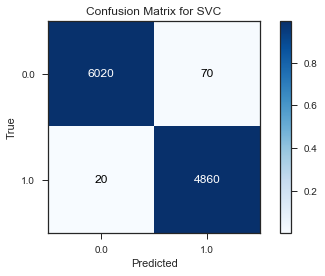

In [33]:
val_conf_SVM_L_opt, val_scores_SVM_L_opt, val_time_SVM_L = classify(cancer_prepared, np.array(df['y']),
                                                 classifiers['SVM'](kernel='linear', C=grid_search_L.best_params_['C'],
                                                                        gamma = grid_search_L.best_params_['gamma']))

print('The average training time is %0.6f seconds'%val_time_SVM_L.mean())

In [34]:
cvres = grid_search_L.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.894257064721969 {'C': 0.03125, 'gamma': 3.0517578125e-05}
0.894257064721969 {'C': 0.03125, 'gamma': 6.103515625e-05}
0.894257064721969 {'C': 0.03125, 'gamma': 0.0001220703125}
0.894257064721969 {'C': 0.03125, 'gamma': 0.000244140625}
0.894257064721969 {'C': 0.03125, 'gamma': 0.00048828125}
0.894257064721969 {'C': 0.03125, 'gamma': 0.0009765625}
0.894257064721969 {'C': 0.03125, 'gamma': 0.001953125}
0.894257064721969 {'C': 0.03125, 'gamma': 0.00390625}
0.894257064721969 {'C': 0.03125, 'gamma': 0.0078125}
0.894257064721969 {'C': 0.03125, 'gamma': 0.015625}
0.894257064721969 {'C': 0.03125, 'gamma': 0.03125}
0.894257064721969 {'C': 0.03125, 'gamma': 0.0625}
0.894257064721969 {'C': 0.03125, 'gamma': 0.125}
0.894257064721969 {'C': 0.03125, 'gamma': 0.25}
0.894257064721969 {'C': 0.03125, 'gamma': 0.5}
0.894257064721969 {'C': 0.03125, 'gamma': 1.0}
0.894257064721969 {'C': 0.03125, 'gamma': 2.0}
0.894257064721969 {'C': 0.03125, 'gamma': 4.0}
0.894257064721969 {'C': 0.03125, 'gamma': 8.0}
0.94

0.9863263445761167 {'C': 512.0, 'gamma': 0.125}
0.9863263445761167 {'C': 512.0, 'gamma': 0.25}
0.9863263445761167 {'C': 512.0, 'gamma': 0.5}
0.9863263445761167 {'C': 512.0, 'gamma': 1.0}
0.9863263445761167 {'C': 512.0, 'gamma': 2.0}
0.9863263445761167 {'C': 512.0, 'gamma': 4.0}
0.9863263445761167 {'C': 512.0, 'gamma': 8.0}
0.9872379216043756 {'C': 1024.0, 'gamma': 3.0517578125e-05}
0.9872379216043756 {'C': 1024.0, 'gamma': 6.103515625e-05}
0.9872379216043756 {'C': 1024.0, 'gamma': 0.0001220703125}
0.9872379216043756 {'C': 1024.0, 'gamma': 0.000244140625}
0.9872379216043756 {'C': 1024.0, 'gamma': 0.00048828125}
0.9872379216043756 {'C': 1024.0, 'gamma': 0.0009765625}
0.9872379216043756 {'C': 1024.0, 'gamma': 0.001953125}
0.9872379216043756 {'C': 1024.0, 'gamma': 0.00390625}
0.9872379216043756 {'C': 1024.0, 'gamma': 0.0078125}
0.9872379216043756 {'C': 1024.0, 'gamma': 0.015625}
0.9872379216043756 {'C': 1024.0, 'gamma': 0.03125}
0.9872379216043756 {'C': 1024.0, 'gamma': 0.0625}
0.987237921

The test accuracy is 0.9855
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       151
           1       0.99      0.98      0.98       124

    accuracy                           0.99       275
   macro avg       0.99      0.98      0.99       275
weighted avg       0.99      0.99      0.99       275



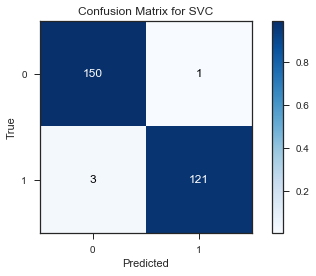

In [35]:
#  Fitting on the training data
SVM_L = classifiers['SVM'](kernel='linear', 
                           C=grid_search_L.best_params_['C'], 
                          gamma = grid_search_L.best_params_['gamma'])
SVM_L.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = SVM_L.predict(scaled_test)
test_score_SVM_L = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_SVM_L)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_SVM_L = plot_confusion(test_pred, df_test['y'],SVM_L)

# 7. Support Vector Machines - RBF Kernel

In [36]:
param_grid = [
    {'C':2.**np.linspace(-5,15,21),'gamma':2.**np.linspace(-15,3,19)}
]

clf = SVC(kernel='rbf')

start = time()
grid_search_RBF = GridSearchCV(clf, param_grid, cv=10,n_jobs=-1)
grid_search_RBF.fit(cancer_prepared, np.array(df['y']))
print('Time take to search for the best combination si %0.6f seconds'% (time()-start))

Time take to search for the best combination si 22.902215 seconds


The model score is 1.000 (+/- 0.000)
The IQR is 0.000 between [1.00,1.00]
There is 0 deleted rows
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6090
         1.0       1.00      1.00      1.00      4880

    accuracy                           1.00     10970
   macro avg       1.00      1.00      1.00     10970
weighted avg       1.00      1.00      1.00     10970

The average training time is 0.005965 seconds


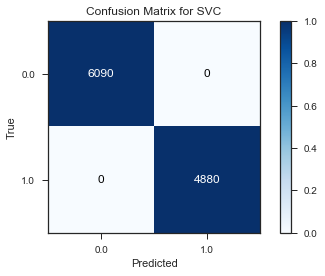

In [37]:
val_conf_SVM_RBF, val_scores_SVM_RBF, val_time_SVM_RBF = classify(cancer_prepared, np.array(df['y']),
                                                             classifiers['SVM'](kernel='rbf', 
                                                                                C=grid_search_RBF.best_params_['C'],
                                                                        gamma = grid_search_RBF.best_params_['gamma']))

print('The average training time is %0.6f seconds'%val_time_SVM_RBF.mean())

The test accuracy is 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



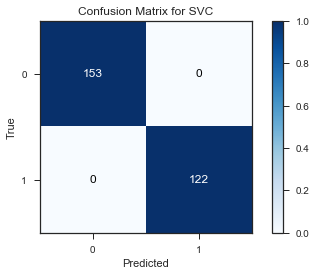

In [38]:
#  Fitting on the training data
SVM_RBF = classifiers['SVM'](kernel='rbf', 
                           C=grid_search_RBF.best_params_['C'], 
                          gamma = grid_search_RBF.best_params_['gamma'])
SVM_RBF.fit(cancer_prepared, np.array(df['y']))

# Getting predictions and getting the accuracy score with confusion matrix and classification report
test_pred = SVM_RBF.predict(scaled_test)
test_score_SVM_RBF = accuracy_score(test_pred, np.array(df_test['y']))
print('The test accuracy is %0.4f'%test_score_SVM_RBF)
print(classification_report(test_pred, np.array(df_test['y'])))
_,test_conf_SVM_L = plot_confusion(test_pred, df_test['y'],SVM_RBF)

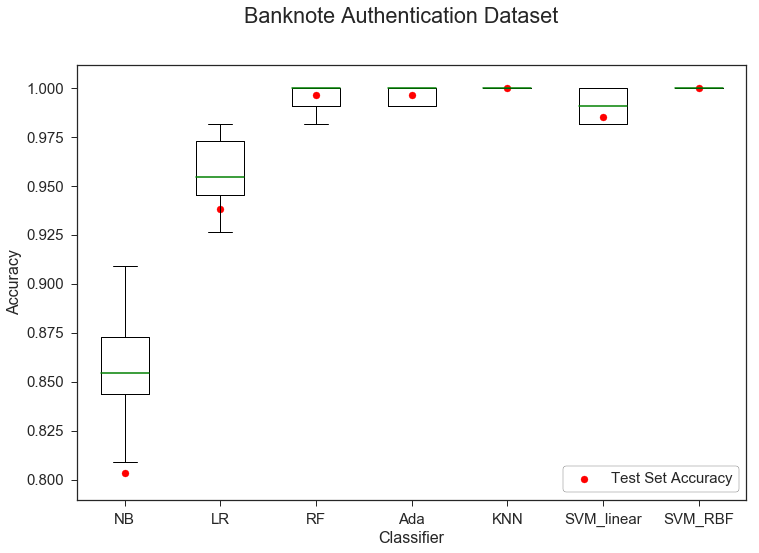

In [45]:
sns.set(font_scale=1.5)
sns.set_style('ticks')
median_prop = dict(color='g', linewidth = 1.5)
fig = plt.figure(figsize=(12,8))
fig.suptitle('Banknote Authentication Dataset')
ax = fig.add_subplot(111)
method_labels = ['NB','LR','RF','Ada','KNN','SVM_linear','SVM_RBF']
test_results = [test_score_NB, test_score_LR, test_score_RF, test_score_Ada, 
                test_score_KNN, test_score_SVM_L, test_score_SVM_RBF]
plt.boxplot([val_scores_NB, val_scores_LR, val_scores_RF, val_scores_Ada, 
             val_scores_KNN, val_scores_SVM_L_opt, val_scores_SVM_RBF], medianprops = median_prop)
ax.set_xticklabels(method_labels)
plt.scatter(x=range(1,8), y=test_results, color='r', label='Test Set Accuracy')
ax.legend(frameon=True, edgecolor='black',loc='lower right')
# ax.set_ylim([0.4,1])
ax.set_ylabel('Accuracy', fontsize = 16)
ax.set_xlabel('Classifier', fontsize = 16)
plt.show()


In [40]:
test_results

[0.8036363636363636,
 0.9381818181818182,
 0.9963636363636363,
 0.9963636363636363,
 1.0,
 0.9854545454545455,
 1.0]

In [41]:
val_results = [val_scores_NB.mean(), val_scores_LR.mean(), val_scores_RF.mean(), val_scores_Ada.mean(), 
             val_scores_KNN.mean(), val_scores_SVM_L_opt.mean(), val_scores_SVM_RBF.mean()]
pd.DataFrame(val_results)

,0
0,0.853276
1,0.955354
2,0.992958
3,0.997264
4,0.999083
5,0.991793
6,1.000000


In [42]:
import pandas as pd
pd.DataFrame([0.8327272727272728,
 0.9563636363636364,
 0.9854545454545455,
 0.9963636363636363,
 1.0,
 0.9854545454545455,
 1.0])

,0
0,0.832727
1,0.956364
2,0.985455
3,0.996364
4,1.000000
5,0.985455
6,1.000000


In [44]:
val_banknote=[val_scores_NB, val_scores_LR, val_scores_RF, val_scores_Ada, 
             val_scores_KNN, val_scores_SVM_L_opt, val_scores_SVM_RBF]
%store val_banknote

Stored 'val_banknote' (list)
